# Atomic Simulation Environment (ASE)

## Atoms Object

In [2]:
from ase.build import molecule

# Build H2 molecule
h2 = molecule('H2')
print("H2 molecule:", h2)

H2 molecule: Atoms(symbols='H2', pbc=False)


In [ ]:
!pip install nglview==3.1.0

In [3]:
from ase.visualize import view

view(h2, viewer='ngl')

In [12]:
from ase.calculators.lj import LennardJones

# Create Lennard-Jones calculator
lj_calculator = LennardJones(sigma=  3.4, epsilon = 120* 8.617333262145e-5)

# Set the calculator for the H2 molecule
h2.calc = lj_calculator

# Calculate the potential energy
potential_energy = h2.get_potential_energy()
print("Potential energy of H2 with Lennard-Jones potential:", potential_energy)

Potential energy of H2 with Lennard-Jones potential: 23.100769499895506


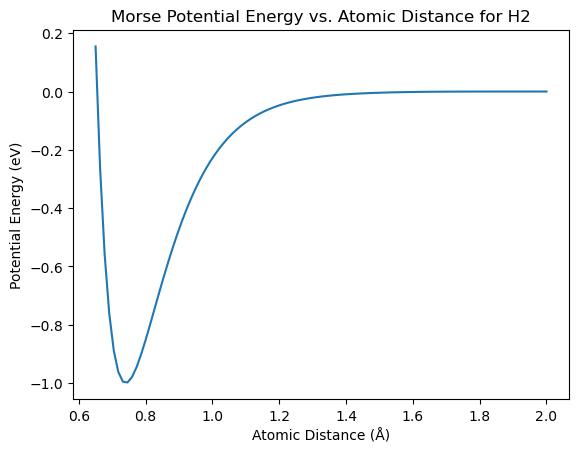

In [87]:
import numpy as np
from ase.calculators.morse import MorsePotential
from ase import Atoms
import matplotlib.pyplot as plt

# Create a range of distances
distances = np.linspace(0.65, 2, 100)

# Initialize Morse potential calculator
morse_calculator = MorsePotential(D0=0.3429, alpha=1.02, r0=0.74)

# Calculate energies for each distance
energies = []
for d in distances:
    h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, d]])
    h2.calc = morse_calculator
    energies.append(h2.get_potential_energy())

# Plot the results
plt.plot(distances, energies)
plt.xlabel('Atomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Morse Potential Energy vs. Atomic Distance for H2')
plt.show()


In [1]:
from ase.vibrations import Vibrations

h2 = molecule('H2',positions=[[0, 0, 0], [0, 0, 0.74]])
h2.calc = morse_calculator
# Perform vibrational analysis
vib = Vibrations(h2)
vib.run()
vib.write_mode()
# Print vibrational frequencies
vib.summary()

# Clean up files generated during the vibrational analysis
vib.clean()



NameError: name 'molecule' is not defined

In [12]:
from ase.visualize import view
from ase.io import read
traj = read('vib.3.traj', index=':', format='traj')
view(traj, viewer='ngl')

In [105]:
import os
from ase.calculators.emt import EMT
calculator = EMT()

from ase.build import bulk
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution,Stationary
from ase.md.verlet import VelocityVerlet
from ase.md import MDLogger
from ase import units
from time import perf_counter
import numpy as np

# Set up a fcc-Al crystal
atoms = bulk("Al","fcc",a=4.3,cubic=True)
atoms.pbc = True
atoms *= 3
print("atoms = ",atoms)

# Set calculator (EMT in this case)
atoms.calc = calculator

# input parameters
time_step    = 1.0      # MD step size in fsec
temperature  = 1600     # Temperature in Kelvin
num_md_steps = 100000   # Total number of MD steps
num_interval = 1000     # Print out interval for .log and .traj

# Set the momenta corresponding to the given "temperature"
MaxwellBoltzmannDistribution(atoms, temperature_K=temperature,force_temp=True)
Stationary(atoms)  # Set zero total momentum to avoid drifting

# Set output filenames
output_filename = "./al"
log_filename = output_filename + ".log"
print("log_filename = ",log_filename)
traj_filename = output_filename + ".traj"
print("traj_filename = ",traj_filename)

# Remove old files if they exist
if os.path.exists(log_filename): os.remove(log_filename)
if os.path.exists(traj_filename): os.remove(traj_filename)

# Define the MD dynamics class object
dyn = VelocityVerlet(atoms,
                     time_step * units.fs,
                     trajectory = traj_filename,
                     loginterval=num_interval
                    )

# Print statements
def print_dyn():
    imd = dyn.get_number_of_steps()
    time_md = time_step*imd
    etot  = atoms.get_total_energy()
    ekin  = atoms.get_kinetic_energy()
    epot  = atoms.get_potential_energy()
    temp_K = atoms.get_temperature()
    print(f"   {imd: >3}     {etot:.9f}     {ekin:.9f}    {epot:.9f}   {temp_K:.2f}")

dyn.attach(print_dyn, interval=num_interval)

# Set MD logger
dyn.attach(MDLogger(dyn, atoms, log_filename, header=True, stress=False,peratom=False, mode="w"), interval=num_interval)

# Now run MD simulation
print(f"\n    imd     Etot(eV)    Ekin(eV)    Epot(eV)    T(K)")
dyn.run(num_md_steps)

print("\nNormal termination of the MD run!")

/var/folders/tk/8gzsg015737930qvxbpdm7_00000gn/T/ipykernel_76163/3470179650.py:16: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  atoms *= 3


atoms =  Atoms(symbols='Al108', pbc=True, cell=[12.899999999999999, 12.899999999999999, 12.899999999999999])
log_filename =  ./al.log
traj_filename =  ./al.traj

    imd     Etot(eV)    Ekin(eV)    Epot(eV)    T(K)
     0     31.944677463     22.336120234    9.608557229   1600.00
   1000     31.947380575     8.678893413    23.268487162   621.69


KeyboardInterrupt: 

In [2]:
from ase.io import Trajectory

output_filename = "./al"
log_filename = output_filename + ".log"
print("log_filename = ",log_filename)
traj_filename = output_filename + ".traj"

traj = Trajectory(traj_filename)




log_filename =  ./al.log


In [6]:
from ase.visualize import view

view(traj, viewer='ngl')
